In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
N0=30
gamma= 8 # VITA MEDIA 6P
alpha=1 # rate eccitazione sul 70s




In [30]:
def Prob_decadere_t(t,dt,life=gamma):
    
    a=np.exp(-life*t)*(1-np.exp(-life*dt))

    return a

In [31]:
def Prob_eccitare_Dt(Dt,dt,life=alpha):
    
    a=np.exp(-life*Dt)*(1-np.exp(-life*dt))

    return a

In [48]:



def evoluzione(t_blue,t_IR,N6p,N_step,gamma,alpha):
    dt=t_IR/N_step
    t=0
    N70s=0
    N5s=0
    while N6p!=0 and t<t_blue:
       # prima parte prima che si acccenda l'infrarosso
        t=t+dt
        for j in range(N6p):
            a=np.random.uniform(0,1)
            p5s=gamma*dt
            if a<=p5s:
                N6p=N6p-1
                N5s=N5s+1

    t=0
    while N6p!=0 and t<t_IR:
        t=t+dt
        for i in range(N6p):
            a=np.random.uniform(0,1)
            p5s=gamma*dt
            p70s=alpha*dt
            if a<=p5s:
                N6p=N6p-1
                N5s=N5s+1
            if p5s<=a<=p5s+p70s:
                N6p=N6p-1
                N70s=N70s+1

    
    return N70s, N5s, N6p



    
    



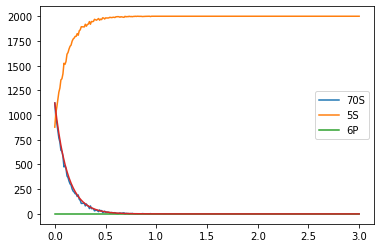

In [68]:
N_punti=300
alpha=10
gamma=8
Evo_70s=np.zeros(N_punti)
Evo_5s=np.zeros(N_punti)
Evo_6p=np.zeros(N_punti)
t_delay=np.linspace(0,3,N_punti)
t_INF=5
N0=2000
i=0
for delay in np.linspace(0,3,N_punti):
    Evo_70s[i],Evo_5s[i],Evo_6p[i]=evoluzione(delay,t_IR=t_INF,N6p=N0,N_step=1000,gamma=gamma,alpha=alpha)
    i=i+1

plt.plot(t_delay,Evo_70s,label='70S')
plt.plot(t_delay,Evo_5s,label='5S')
plt.plot(t_delay,Evo_6p,label='6P')
plt.plot(t_delay,Evo_70s[0]*np.exp(-gamma*t_delay))
plt.legend()

plt.show()


    
    

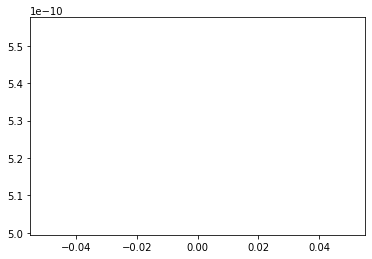

In [65]:
plt.plot(Evo_70s[0]*np.exp(-gamma*delay))
plt.show()